# 🧠 **DevelopersHub Corporation**
## *Data Science & Analytics Internship — Tasks*

Welcome to my **Data Science & Analytics Internship Portfolio** at **DevelopersHub Corporation**. This notebook compiles all assigned internship tasks, highlighting practical work across **data preprocessing, exploratory analysis, visualization, statistical modeling, and predictive machine learning**.

Each task is structured with clear explanations, well-written code, and meaningful insights to demonstrate both **technical competence** and **real-world application**.

📅 **Submission Deadline:** 30 December 2025  
👨‍💻 **Intern:** Muhammad Shayan Haider  
🆔 **Intern ID:** DHC-729  
🏢 **Organization:** DevelopersHub Corporation  
📊 **Domain:** Data Science & Analytics


# ***Advanced Task Set***

# 🧩 **Task 2: Customer Segmentation Using Unsupervised Learning**

## 🎯 **Objective:**
The goal of this task is to **cluster customers based on their spending habits** and propose marketing strategies tailored to each segment.  
This involves **unsupervised learning**, dimensionality reduction, and visualization techniques.

## 📂 **Dataset:**
We will use the **Mall Customers Dataset**, which contains:  
- CustomerID  
- Gender  
- Age  
- Annual Income (k$)  
- Spending Score (1-100)  

The dataset is commonly used for customer segmentation and marketing analytics.

## 📝 **Task Instructions:**
1. **Load and explore the dataset** using Pandas:  
   - `dataset.shape` → view dimensions  
   - `dataset.columns` → list feature names  
   - `dataset.head()` → preview first rows  

2. **Conduct Exploratory Data Analysis (EDA)**  
   - Summary statistics, distribution plots, and correlations  
   - Visualize spending patterns  

3. **Apply K-Means Clustering**  
   - Determine optimal number of clusters using Elbow or Silhouette method  
   - Assign cluster labels to customers  

4. **Visualize Clusters** using PCA or t-SNE for dimensionality reduction  

5. **Propose marketing strategies** for each customer segment  

## 💡 **Learning Outcome:**
This task helps understand **unsupervised learning**, feature relationships, dimensionality reduction, and **customer-centric marketing strategy development**.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [8]:
# Load Mall Customers dataset
df = pd.read_csv("Mall_Customers.csv")

# Preview dataset
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# Rename column
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


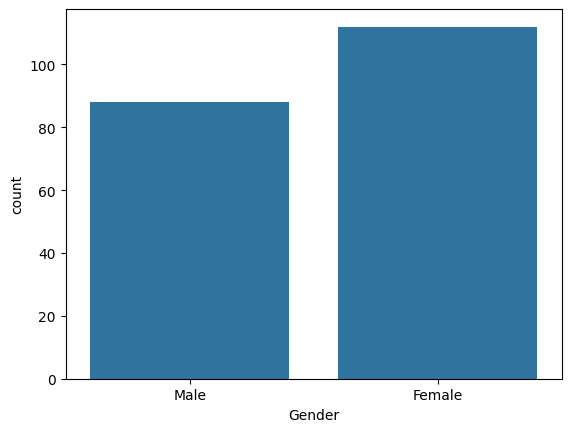

In [13]:
# Check gender distribution
sns.countplot(x='Gender', data=df)
plt.show()

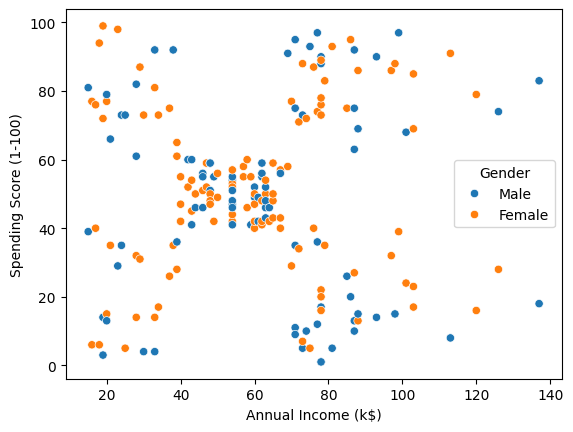

In [12]:
# Visualize Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.show()

In [14]:
# Selecting numerical features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

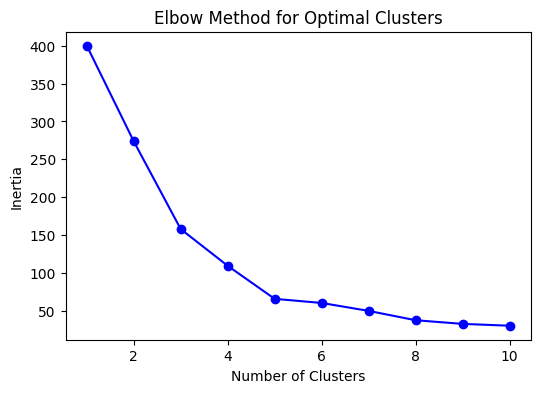

In [15]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [16]:
# Using 5 clusters (example from Elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df['Cluster'].value_counts()

,count
Cluster,
0,81
1,39
3,35
4,23
2,22


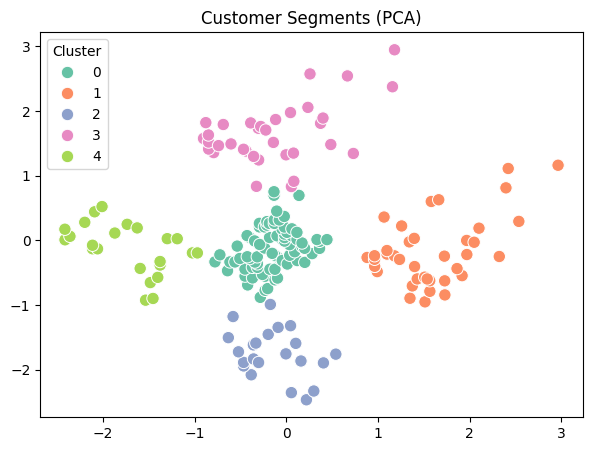

In [17]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set2', s=80)
plt.title("Customer Segments (PCA)")
plt.show()

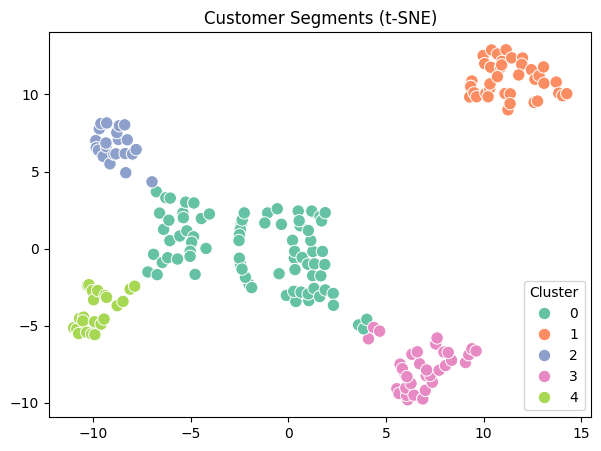

In [18]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df['Cluster'], palette='Set2', s=80)
plt.title("Customer Segments (t-SNE)")
plt.show()

## **Results & Insights:**

After clustering customers based on **Annual Income** and **Spending Score**, we identified **5 distinct customer segments**:

- **Cluster 0:** Low income, low spending – budget-conscious customers.  
  - **Marketing Strategy:** Offer discounts, loyalty programs, and affordable packages.

- **Cluster 1:** Medium income, high spending – big spenders.  
  - **Marketing Strategy:** Premium offerings, personalized recommendations, and exclusive deals.

- **Cluster 2:** High income, low spending – selective customers.  
  - **Marketing Strategy:** Highlight quality and exclusivity; personalized engagement.

- **Cluster 3:** Low income, high spending – impulsive buyers.  
  - **Marketing Strategy:** Flash sales, time-limited offers, small value bundles.

- **Cluster 4:** High income, high spending – ideal target customers.  
  - **Marketing Strategy:** VIP programs, luxury products, high-touch marketing.

💡 These segments help **design targeted marketing campaigns** and improve overall ROI.